In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

%matplotlib inline

In [2]:
from scipy.optimize import leastsq


def phase_finder(phase, cmplx):
    return (cmplx * np.exp(-2 * np.pi * phase/360 * 1j)).imag


def phase_shift(phase, cmplx):
    return cmplx * np.exp(-2 * np.pi * phase/360 * 1j)


def phase_fit(cmplx, start_phase):
    phase = leastsq(phase_finder, start_phase, args=cmplx)[0]
    return phase[0], phase_shift(phase, cmplx)

In [3]:
fn_fid = glob.glob("fid/*.fft")
fn_fid = sorted(fn_fid, key=lambda a: int(a[12:].split(".")[0]))
fn_he = glob.glob("he/*.fft")
fn_he = sorted(fn_he, key=lambda a: int(a[11:].split(".")[0]))
labels = sorted(int(fn[12:].split(".")[0]) for fn in fn_fid)
labels

[]

### Phasenkorrektur

(-70, 70)

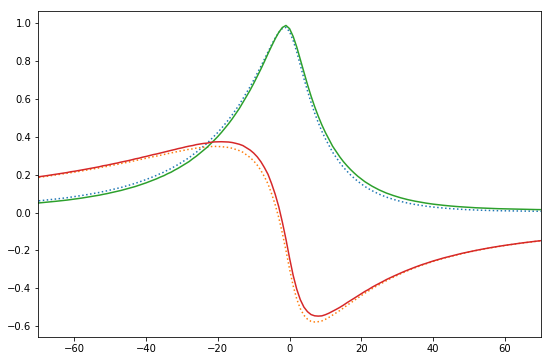

In [4]:
plt.rcParams['figure.figsize'] = (9, 6)

i, omega, re, im, r, phi = np.loadtxt(fn_he[4], unpack=True)
plt.plot(i, re, linestyle=":")
plt.plot(i, im, linestyle=":")
phase, cmplx = phase_fit(re + 1j*im, 0)
plt.plot(i, cmplx.real)
plt.plot(i, cmplx.imag)
plt.xlim(-70, 70)

(-70, 70)

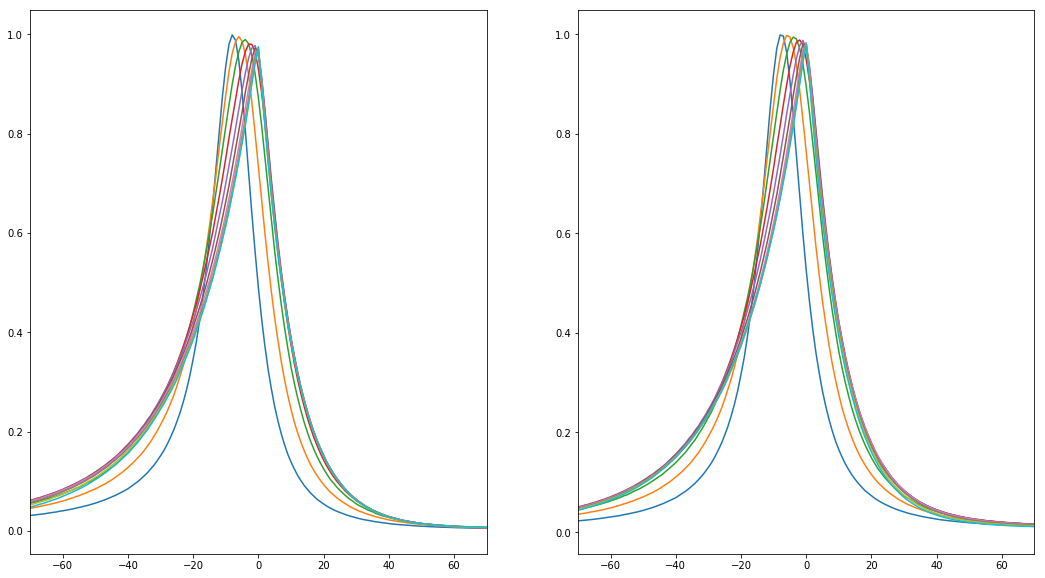

In [5]:
plt.rcParams['figure.figsize'] = (18, 10)

fig, (ax1, ax2) = plt.subplots(1, 2)
for f in fn_he:
    i, omega, re, im, r, phi = np.loadtxt(f, unpack=True)
    ax1.plot(i, re)
    phase, cmplx = phase_fit(re + 1j*im, 0)
#     print(phase)
    ax2.plot(i, cmplx.real)
ax1.set_xlim(-70, 70)
ax2.set_xlim(-70, 70)
# plt.grid(True)

### Vergleich Hahn-Echo/FID

In [6]:
plt.rcParams['figure.figsize'] = (9, 6)

# i, omega, re, im, r, phi = np.loadtxt(fn_he[11], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[11], unpack=True)
# plt.plot(i, re+0.9, color="tab:cyan", label="he lifetime=8192")
plt.plot(i2*-1, re2+0.9, linestyle="-.", color="tab:brown", label="fid lifetime=8192")

# i, omega, re, im, r, phi = np.loadtxt(fn_he[7], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[7], unpack=True)
# plt.plot(i, re+0.6, color="tab:green", label="he lifetime=512")
plt.plot(i2*-1, re2+0.6, linestyle="-.", color="tab:green", label="fid lifetime=512")

# i, omega, re, im, r, phi = np.loadtxt(fn_he[4], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[4], unpack=True)
# plt.plot(i, re+0.3, color="tab:red", label="he lifetime=64")
plt.plot(i2*-1, re2+0.3, linestyle="-.", color="tab:red", label="fid lifetime=64")

# i, omega, re, im, r, phi = np.loadtxt(fn_he[2], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[2], unpack=True)
# plt.plot(i, re, color="tab:blue", label="he lifetime=16")
plt.plot(i2*-1, re2, linestyle="-.", color="tab:blue", label="fid lifetime=16")

# i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[1], unpack=True)
# plt.plot(i, re, color="tab:blue", label="he lifetime=16")
plt.plot(i2*-1, re2-0.3, linestyle="-.", color="tab:orange", label="fid lifetime=8")

# i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_fid[0], unpack=True)
# plt.plot(i, re, color="tab:blue", label="he lifetime=16")
plt.plot(i2*-1, re2-0.6, linestyle="-.", color="tab:cyan", label="fid lifetime=4")

plt.xlim(-70, 70)
plt.legend()

# fig_vergleich_fid_he = plt.gcf()
# fig_vergleich_fid_he.savefig("plots/vergleich_fid_he.pdf", bbox_inches="tight")

IndexError: list index out of range

### Schwerpunkt

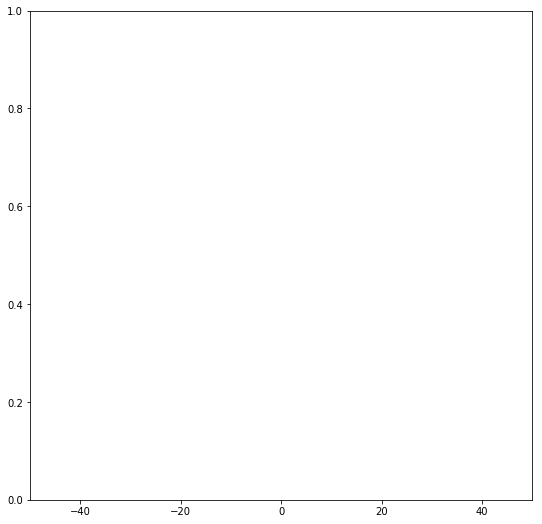

In [7]:
from scipy.integrate import simps

plt.rcParams['figure.figsize'] = (9, 9)

for j, fn in enumerate(reversed(fn_fid)):
    i, omega, re, im, r, phi = np.loadtxt(fn, unpack=True)
    plt.plot(i*-1, re-j*0.3, label="fid lifetime={}".format(labels[11-j]))
    
    index = int((i.shape[0]-1)/2)
    int_width = 100
    i2 = i[index-int_width:index+int_width+1]
    re2 = re[index-int_width:index+int_width+1]
    
    xfx = simps(-i2*re2, -i2)
    fx = simps(re2, -i2)
    cog = xfx / fx
    print(cog)
    
#     xfx = simps(-i*re, -i)
#     fx = simps(re, -i)
#     cog = xfx / fx
#     print(cog)
    
    plt.scatter(cog, 0.8-j*0.3)


plt.xlim(-50, 50)
plt.legend()

# fig_schwerpunkt_in_spektren = plt.gcf()
# fig_schwerpunkt_in_spektren.savefig("plots/schwerpunkt_in_spektren.pdf", bbox_inches="tight")

# Daten

### Rohdaten

(-150, 150)

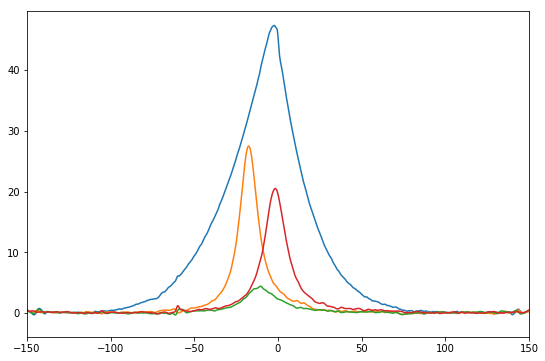

In [8]:
plt.rcParams['figure.figsize'] = (9, 6)

spek320 = np.loadtxt("/home/jens/Documents/projekte/crn/170912/SPEK/temp_abh/320K/1783_CRN_T2_320K/CRN_T2_320K_1783_1.ts.spec.nmr", comments="!")
freq320 = spek320[:,0] / 1e3
real320 = spek320[:,1] / 1e3
plt.plot(freq320, real320)


spek370 = np.loadtxt("/home/jens/Documents/projekte/crn/170731/spektren/1395_CRN_T2_370K/CRN_T2_370K_1395_1.ts.spec.nmr", comments="!")
freq370 = spek370[:,0] / 1e3
real370 = spek370[:,1] / 1e3
plt.plot(freq370, real370)

spek395 = np.loadtxt("/home/jens/Documents/projekte/crn/170731/spektren/1380_CRN_T2_395K/CRN_T2_395K_1380_1.ts.spec.nmr", comments="!")
freq395 = spek395[:,0] / 1e3
real395 = spek395[:,1] / 1e3
plt.plot(freq395, real395)

spek440 = np.loadtxt("/home/jens/Documents/projekte/crn/170731/spektren/1353_CRN_T2_440K/CRN_T2_440K_1353_1.ts.spec.nmr", comments="!")
freq440 = spek440[:,0] / 1e3
real440 = spek440[:,1] / 1e3
plt.plot(freq440, real440)

plt.xlim(-150, 150)

In [9]:
def interpolatespec(x,  y, factor, center, norm):
    return np.interp(x, (x + center) * factor, y * norm, left=0.0, right=0.0)

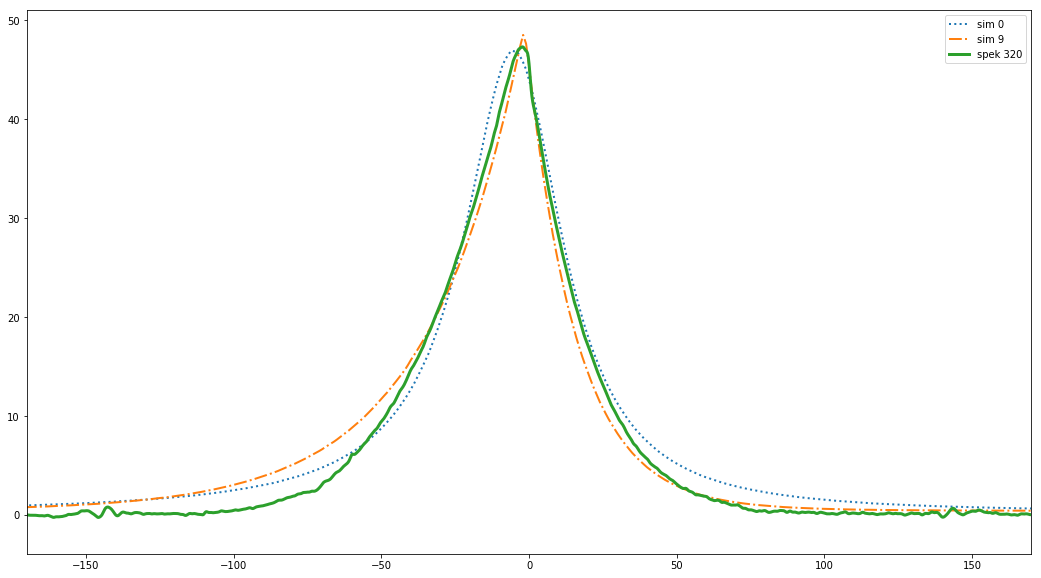

In [10]:
plt.rcParams['figure.figsize'] = (18, 10)

i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
i2, omega2, re2, im2, r2, phi2 = np.loadtxt(fn_he[9], unpack=True)
phase, cmplx = phase_fit(re + 1j*im, 0)
phase2, cmplx2 = phase_fit(re2 + 1j*im2, 0)
# cmplx2 = phase_shift(-3, cmplx2)


plt.plot(i, interpolatespec(i, cmplx.real, 2.5, 5.5, 47), linewidth=2, linestyle=":", label="sim 0")
plt.plot(i, interpolatespec(i, cmplx2.real, 1.6, -1.0, 50), linewidth=2, linestyle="-.", label="sim 9")
# plt.plot((i+2)*0.8, 0.9 * (interpolatespec(i, cmplx.real, 4.0, 3.0, 15) + interpolatespec(i, cmplx2.real, 1.4, -2.0, 40)), label="sim 0+9")

plt.plot(freq320, real320, label="spek 320", linewidth=3)

plt.xlim(-170, 170)
plt.legend()

fig_vergleich_320_he16_8192 = plt.gcf()
fig_vergleich_320_he16_8192.savefig("plots/vergleich_320_he16_8192.pdf", bbox_inches="tight")

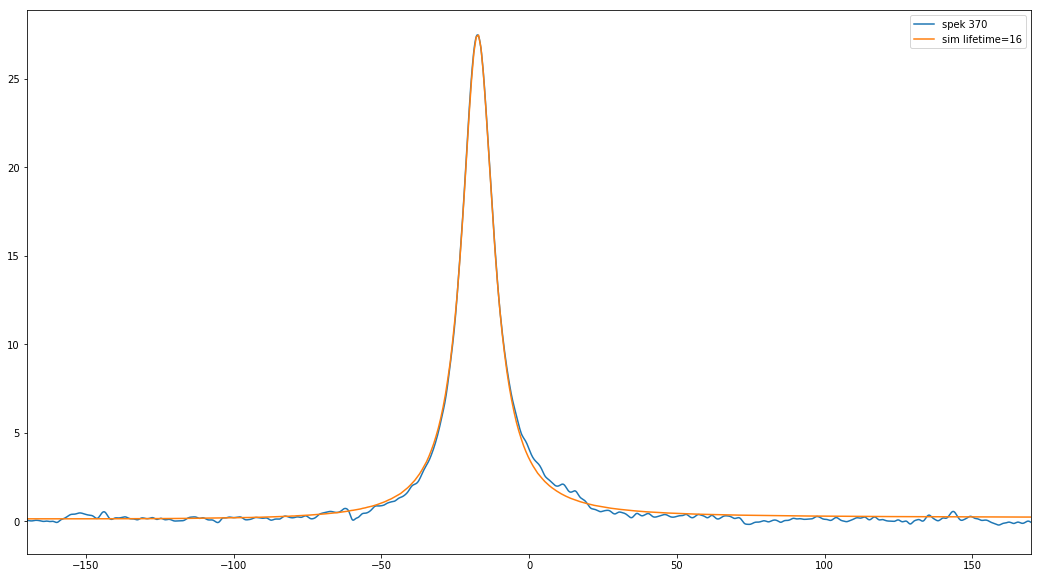

In [11]:
plt.rcParams['figure.figsize'] = (18, 10)

i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
phase, cmplx = phase_fit(re + 1j*im, 0)
cmplx = phase_shift(-3, cmplx)
plt.plot(freq370, real370, label="spek 370")
plt.plot((i-14.4)*0.80, cmplx.real*27.5, label="sim lifetime=16")
plt.xlim(-170, 170)
plt.legend()

fig_vergleich_370_he16 = plt.gcf()
fig_vergleich_370_he16.savefig("plots/vergleich_370_he16.pdf", bbox_inches="tight")

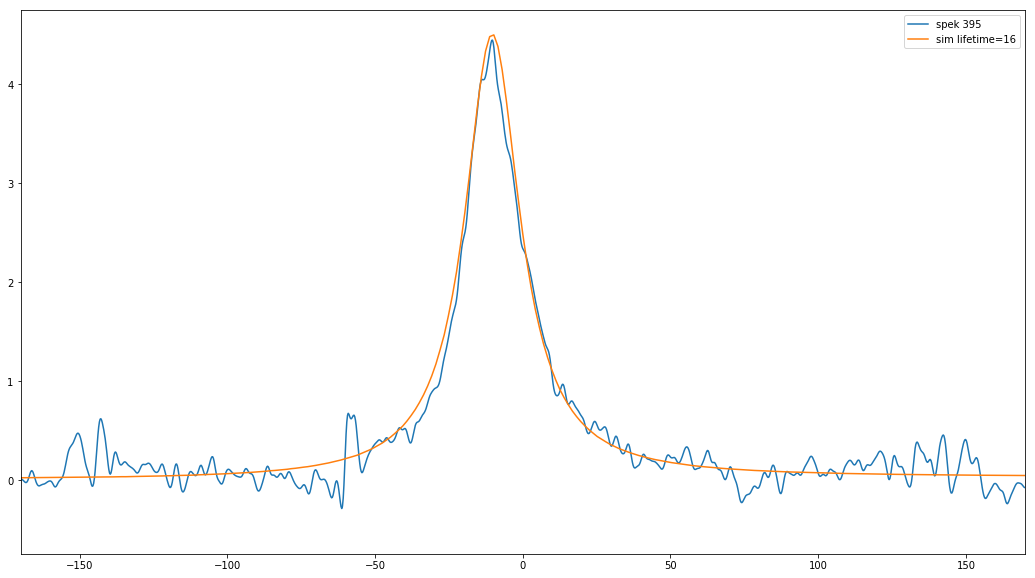

In [12]:
plt.rcParams['figure.figsize'] = (18, 10)

i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
phase, cmplx = phase_fit(re + 1j*im, 0)
cmplx = phase_shift(-3, cmplx)
plt.plot(freq395, real395, label="spek 395")
plt.plot(i*1.40, cmplx.real*4.5, label="sim lifetime=16")
plt.xlim(-170, 170)
plt.legend()

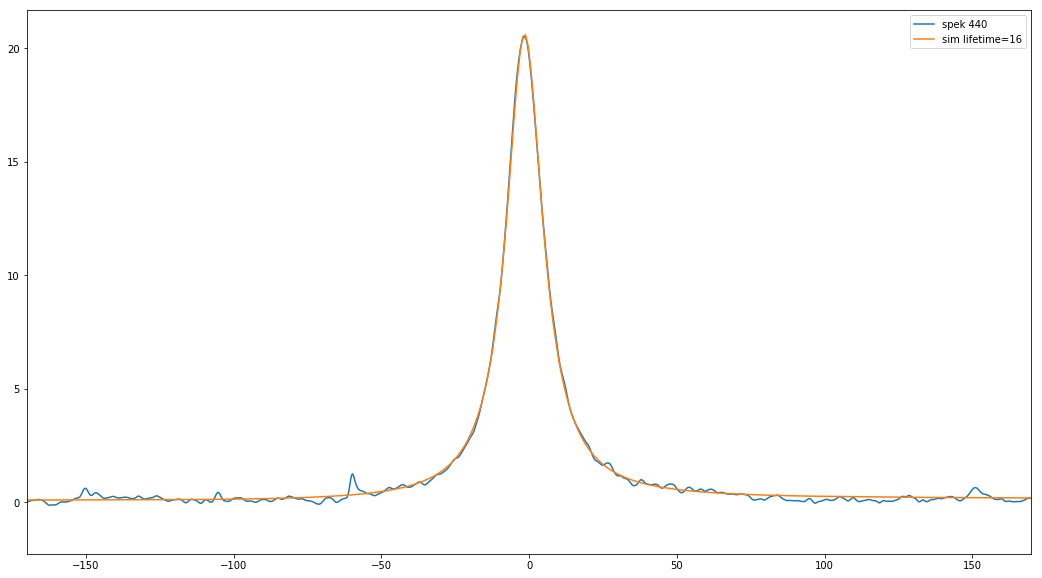

In [13]:
plt.rcParams['figure.figsize'] = (18, 10)

i, omega, re, im, r, phi = np.loadtxt(fn_he[0], unpack=True)
phase, cmplx = phase_fit(re + 1j*im, 0)
cmplx = phase_shift(-3, cmplx)
plt.plot(freq440, real440, label="spek 440")
plt.plot(i*0.93+5.3, cmplx.real*20.6, label="sim lifetime=16")
plt.xlim(-170, 170)
plt.legend()

fig_vergleich_440_he16 = plt.gcf()
fig_vergleich_440_he16.savefig("plots/vergleich_440_he16.pdf", bbox_inches="tight")